# 3.  Codificación de variables

Conjunto de datos: titanic (incluido en seaborn)

Este conjunto de datos es excelente para trabajar con variables categóricas.

In [44]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [45]:
# Cargar el conjunto de datos
data = sns.load_dataset('titanic')

In [46]:
# Visualizar las primeras filas
print("Conjunto de datos Titanic:")
data.head()

Conjunto de datos Titanic:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [47]:
# Seleccionar columnas categóricas
categorical_cols = ['sex', 'embarked', 'class']

In [48]:
# Codificar con LabelEncoder
label_encoder = LabelEncoder()
data['sex_label'] = label_encoder.fit_transform(data['sex'])

In [49]:
# Codificar con OneHotEncoder
onehot_encoder = pd.get_dummies(data['embarked'], prefix='embarked')

In [50]:
# Combinar con el conjunto original
data = pd.concat([data, onehot_encoder], axis=1)

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado. Crea gráficas en donde veas correcto.

### 1. ¿Qué diferencias encuentras entre LabelEncoder y OneHotEncoder?

LabelEncoder asigna valores enteros a categorías en una sola columna, mientras que OneHotEncoder crea múltiples columnas binarias sin imponer orden entre categorías.

In [51]:
data[["sex","sex_label","embarked", "embarked_C","embarked_Q","embarked_S"]].head(10)

,sex,sex_label,embarked,embarked_C,embarked_Q,embarked_S
0,male,1,S,False,False,True
1,female,0,C,True,False,False
2,female,0,S,False,False,True
3,female,0,S,False,False,True
4,male,1,S,False,False,True
5,male,1,Q,False,True,False
6,male,1,S,False,False,True
7,male,1,S,False,False,True
8,female,0,S,False,False,True
9,female,0,C,True,False,False


### 2. Crea una gráfica de barras comparando las frecuencias de 'sex' antes y después de la codificación con LabelEncoder.

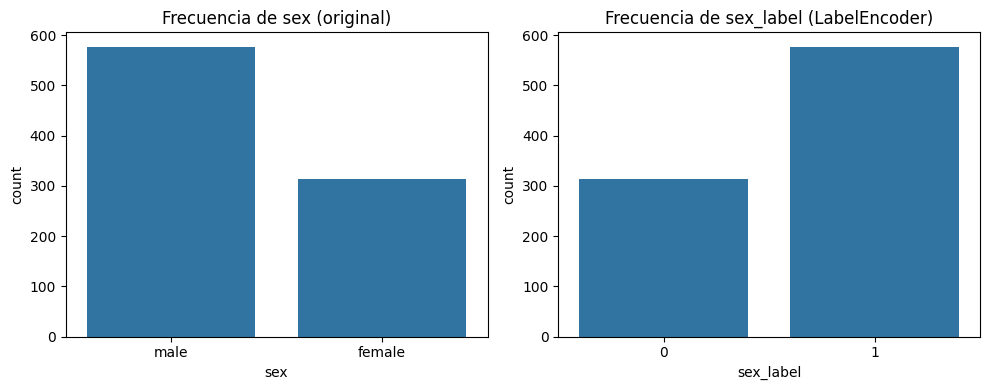

In [52]:
import matplotlib.pyplot as plt

# LabelEncoder
label_encoder = LabelEncoder()
data["sex_label"] = label_encoder.fit_transform(data["sex"])

# Crear figura
plt.figure(figsize=(10,4))

# Antes de la codificación
plt.subplot(1,2,1)
sns.countplot(x="sex", data=data)
plt.title("Frecuencia de sex (original)")

# Después de LabelEncoder
plt.subplot(1,2,2)
sns.countplot(x="sex_label", data=data)
plt.title("Frecuencia de sex_label (LabelEncoder)")

plt.tight_layout()
plt.show()


### 3. Utiliza OneHotEncoder para codificar la columna 'class'. ¿Qué ventajas tiene este enfoque frente a LabelEncoder?

In [53]:
class_onehot = pd.get_dummies(data["class"], prefix="class")
data = pd.concat([data, class_onehot], axis=1)
data[["class"] + class_onehot.columns.tolist()].head()

,class,class_First,class_Second,class_Third
0,Third,False,False,True
1,First,True,False,False
2,Third,False,False,True
3,First,True,False,False
4,Third,False,False,True


Ventajas frente a LabelEncoder
- No introduce orden entre categorías
- Representa correctamente variables nominales
- Mejora el desempeño de modelos lineales y basados en distancia
- Evita interpretaciones erróneas (ej. clase 2 > clase 1)

### 4. Si quisieras aplicar un modelo de aprendizaje automático, ¿qué tipo de codificación elegirías para las variables categóricas? Explica tu respuesta.

Para variables categóricas sin orden como class, OneHotEncoder es la opción correcta frente a LabelEncoder.